In [1]:
# Setting notebook to current work dir
import os
os.chdir("/root/Code/GenerativeModel/")

In [2]:
from utils.experiman import manager
from options.test_options import TestOptions
from data import create_dataset
from models import create_model

In [18]:
parser = manager.get_basic_arg_parser()
parser.set_defaults(run_name="CycleGANTest")
opt = TestOptions(parser).parse()
manager.setup(opt, third_party_tools=('tensorboard',))
# hard-code some parameters for test
opt.num_threads = 0   # test code only supports num_threads = 0
opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
opt.batch_size = 10
opt.drop_last = True
dataset = create_dataset(opt, manager)  # create a dataset given opt.dataset_mode and other options

0
======> UID of this run: 221215-222114-2euQTw
run_number : 0
Directory /root/Log/GenerativeModel/CycleGANTest/0 exists, please choose an option:
Old files deleted.
======> Directory for this run: /root/Log/GenerativeModel/CycleGANTest/0
2022-12-15 22:21:16,689 INFO Opts: Namespace(batch_size=1, code_dir='/root/Code/CycleGAN_rewrite', crop_size=256, data_dir='/root/Dataset/', dataroot='/root/Dataset/maps', dataset_dir='maps', dataset_mode='unaligned', direction='AtoB', drop_last=False, epoch='latest', eval=False, exp_name='GenerativeModel', gpu='0', gpu_ids=[0], init_gain=0.02, init_type='normal', input_nc=3, isTrain=False, load_iter=0, load_size=256, log_dir='/root/Log', max_dataset_size=inf, model='cycle_gan', n_layers_D=3, ndf=64, netD='basic', netG='resnet_9blocks', ngf=64, no_dropout=True, no_flip=False, norm='instance', num_threads=4, option_for_existing_dir=None, output_nc=3, phase='test', preprocess='resize_and_crop', run_name='CycleGANTest', run_number='0', seed=0, serial_bat

In [19]:
model = create_model(opt, manager)      # create a model given opt.model and other options
model.setup(opt)               # regular setup: load and print networks; create schedulers

initialize network with normal
initialize network with normal
model [CycleGANModel] was created
loading the model from /root/Log/GenerativeModel/CycleGAN/0/checkpoints/latest_net_G_A.pth
loading the model from /root/Log/GenerativeModel/CycleGAN/0/checkpoints/latest_net_G_B.pth
======> Networks initialized ======
2022-12-15 22:21:17,754 INFO [Network G_A] Total number of parameters : 11.378 M
2022-12-15 22:21:17,754 INFO [Network G_A] Total number of parameters : 11.378 M
2022-12-15 22:21:17,757 INFO [Network G_B] Total number of parameters : 11.378 M
2022-12-15 22:21:17,757 INFO [Network G_B] Total number of parameters : 11.378 M


In [40]:
from PIL import Image
from utils import util

img = util.tensor2im(dataset.dataset[1]['A'].unsqueeze(0))

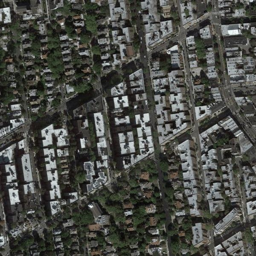

In [41]:
Image.fromarray(img)

In [44]:
manager.log_image("1", img.transpose([2, 0, 1])[None,], 1, 0)


In [17]:
for data in dataset:
    img_a = data['A']
    img_b = data['B']
    break

In [69]:
manager.log_image("img_A", (img_a+1)/2, 1, 0)
manager.log_image("img_A", (img_b+1)/2, 2, 0)

In [56]:
adj_img_a = (img_a+1)/2

In [33]:
img_a[0].unsqueeze(0)[:,[2,0,1],:,:]

IndexError: too many indices for tensor of dimension 3

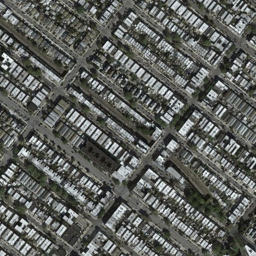

In [67]:
img = util.tensor2im(img_a[4].unsqueeze(0))
Image.fromarray(img)